In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix

In [ ]:
fraud_df = pd.read_csv('/content/application_data.csv')

In [ ]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
fraud_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [ ]:
fraud_df.dropna(axis = 1, inplace = True)

In [ ]:
fraud_df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGIO

In [ ]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [ ]:
y_fraud = fraud_df['TARGET']
X_fraud = fraud_df.drop('TARGET', axis = 1)

In [ ]:
X_fraud.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10'

In [ ]:
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X_fraud, y_fraud, test_size = 0.3, random_state=1)


In [ ]:
X_train_fraud, X_val_fraud, y_train_fraud, y_val_fraud = train_test_split(X_train_fraud, y_train_fraud, test_size = 0.1, random_state=1)

In [ ]:
X_train_fraud.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
120422,239630,Cash loans,F,Y,Y,1,112500.0,270000.0,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
275612,419391,Cash loans,F,N,N,0,135000.0,412942.5,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
186973,316749,Cash loans,M,N,Y,0,225000.0,269550.0,Working,Higher education,...,0,0,0,0,0,0,0,0,0,0
112525,230533,Cash loans,F,N,N,1,90000.0,315000.0,Pensioner,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,0
162524,288413,Cash loans,M,Y,N,0,360000.0,2517300.0,Commercial associate,Higher education,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Scaling Train Dataset
names = X_train_fraud.select_dtypes(include=[np.float64, np.int64]).columns
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X_train_fraud[names])
X_train_fraud[names] = scaler.transform(X_train_fraud[names])

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X_val_fraud[names])
X_val_fraud[names] = scaler.transform(X_val_fraud[names])

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(X_test_fraud[names])
X_test_fraud[names] = scaler.transform(X_test_fraud[names])

In [ ]:
object_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
               'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START']
encoder = OrdinalEncoder()
X_train_fraud[object_cols] = encoder.fit_transform(X_train_fraud[object_cols])
X_val_fraud[object_cols] = encoder.fit_transform(X_val_fraud[object_cols])
X_test_fraud[object_cols] = encoder.fit_transform(X_test_fraud[object_cols])


In [ ]:
X_val_fraud.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
137599,0.447936,0.0,0.0,0.0,1.0,0.000000,0.013125,0.310449,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136284,0.443717,0.0,1.0,1.0,0.0,0.000000,0.001436,0.066858,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171864,0.559096,0.0,0.0,0.0,1.0,0.000000,0.003774,0.008989,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120051,0.390762,0.0,1.0,0.0,1.0,0.111111,0.008115,0.209519,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118048,0.384230,0.0,0.0,0.0,1.0,0.000000,0.011455,0.392252,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Decision tree
dt_clf = DecisionTreeClassifier(random_state=1)

dt_clf = dt_clf.fit(X_train_fraud,y_train_fraud)

y_pred = dt_clf.predict(X_val_fraud)

In [ ]:
print(classification_report(y_val_fraud, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     19826
           1       0.09      0.13      0.11      1700

    accuracy                           0.83     21526
   macro avg       0.51      0.51      0.51     21526
weighted avg       0.86      0.83      0.84     21526



In [ ]:
fi = pd.DataFrame({'features':X_train_fraud.columns,'importance':dt_clf.feature_importances_}).sort_values(by=['importance'], ascending=False)
fi

,features,importance
15,DAYS_REGISTRATION,0.102081
13,DAYS_BIRTH,0.100913
0,SK_ID_CURR,0.098702
16,DAYS_ID_PUBLISH,0.098140
7,AMT_CREDIT,0.086124
14,DAYS_EMPLOYED,0.082883
6,AMT_INCOME_TOTAL,0.063760
12,REGION_POPULATION_RELATIVE,0.061457
26,HOUR_APPR_PROCESS_START,0.054333
33,ORGANIZATION_TYPE,0.041257


In [ ]:
features = ['DAYS_REGISTRATION', 'DAYS_BIRTH', 'SK_ID_CURR', 'DAYS_ID_PUBLISH', 'AMT_CREDIT',
          'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

In [ ]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train_fraud, ysm_train_fraud = sm.fit_resample(X_train_fraud, y_train_fraud)

In [ ]:
X_train_fraud_scaled = X_train_fraud[features]
X_val_fraud_scaled = X_val_fraud[features]
X_test_fraud_scaled = X_test_fraud[features]

In [ ]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train_fraud_scaled, ysm_train_fraud_scaled = sm.fit_resample(X_train_fraud_scaled, y_train_fraud)

In [ ]:
n_inputs = Xsm_train_fraud_scaled.shape[1]

fraud_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])



In [ ]:
fraud_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
fraud_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
fraud_model.fit(Xsm_train_fraud_scaled, ysm_train_fraud_scaled, validation_data=(X_val_fraud_scaled,y_val_fraud)
              , batch_size=25, epochs=20, verbose=2, callbacks = [fraud_callback])

Epoch 1/20
14246/14246 - 21s - loss: 0.6786 - accuracy: 0.5699 - val_loss: 0.7241 - val_accuracy: 0.4649 - 21s/epoch - 1ms/step
Epoch 2/20
14246/14246 - 20s - loss: 0.6723 - accuracy: 0.5852 - val_loss: 0.6675 - val_accuracy: 0.5615 - 20s/epoch - 1ms/step
Epoch 3/20
14246/14246 - 20s - loss: 0.6686 - accuracy: 0.5940 - val_loss: 0.6758 - val_accuracy: 0.5524 - 20s/epoch - 1ms/step
Epoch 4/20
14246/14246 - 20s - loss: 0.6583 - accuracy: 0.6089 - val_loss: 0.6433 - val_accuracy: 0.6106 - 20s/epoch - 1ms/step
Epoch 5/20
14246/14246 - 23s - loss: 0.6553 - accuracy: 0.6131 - val_loss: 0.7529 - val_accuracy: 0.4528 - 23s/epoch - 2ms/step
Epoch 6/20
14246/14246 - 30s - loss: 0.6537 - accuracy: 0.6141 - val_loss: 0.6461 - val_accuracy: 0.5997 - 30s/epoch - 2ms/step
Epoch 7/20
14246/14246 - 20s - loss: 0.6525 - accuracy: 0.6164 - val_loss: 0.6761 - val_accuracy: 0.5681 - 20s/epoch - 1ms/step


In [ ]:
yhat = fraud_model.predict(X_test_fraud_scaled)
yhat

2883/2883 [==============================] - 3s 1ms/step


array([[0.4277387 , 0.57226133],
       [0.41295853, 0.58704144],
       [0.83178717, 0.16821277],
       ...,
       [0.46237102, 0.53762895],
       [0.53575814, 0.4642419 ],
       [0.82595426, 0.17404567]], dtype=float32)

In [ ]:
def threshod_evaluation(yhat, threshold):
    y_pred = []
    for i in range(len(yhat)):
      if yhat[i][0]>=threshold:
        y_pred.append(0)
      else:
        y_pred.append(1)
    return y_pred
y_pred = threshod_evaluation(yhat, 0.5)

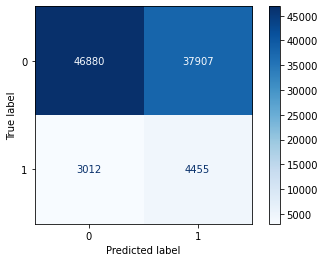

In [ ]:
cm = confusion_matrix(y_test_fraud, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test_fraud, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.55      0.70     84787
           1       0.11      0.60      0.18      7467

    accuracy                           0.56     92254
   macro avg       0.52      0.57      0.44     92254
weighted avg       0.87      0.56      0.65     92254



In [ ]:
y_pred = threshod_evaluation(yhat, 0.3)

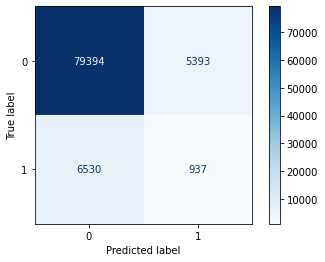

In [ ]:
cm = confusion_matrix(y_test_fraud, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test_fraud, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     84787
           1       0.15      0.13      0.14      7467

    accuracy                           0.87     92254
   macro avg       0.54      0.53      0.53     92254
weighted avg       0.86      0.87      0.87     92254



In [ ]:
y_pred = threshod_evaluation(yhat, 0.4)

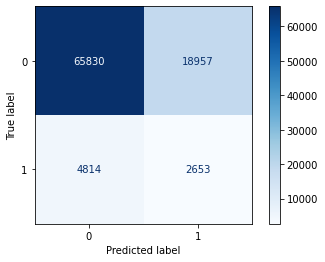

In [ ]:
cm = confusion_matrix(y_test_fraud, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test_fraud, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     84787
           1       0.12      0.36      0.18      7467

    accuracy                           0.74     92254
   macro avg       0.53      0.57      0.51     92254
weighted avg       0.87      0.74      0.79     92254



In [ ]:
# import packages
# matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [ ]:
train_x, test_x = train_test_split(fraud_df, test_size=0.3, random_state=2)
train_x, val_x = train_test_split(train_x, test_size=0.14, random_state=2)

In [ ]:
train_x_AE = train_x[train_x.TARGET == False]
train_x_AE = train_x_AE.drop(['TARGET'], axis=1)

In [ ]:
val_y_AE = val_x["TARGET"]
val_x_AE = val_x.drop(['TARGET'], axis = 1)

test_y_AE = test_x["TARGET"]
test_x_AE = test_x.drop(['TARGET'], axis = 1)

In [ ]:
# Scaling Train Dataset
names = train_x_AE.select_dtypes(include=[np.float64, np.int64]).columns
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(train_x_AE[names])
train_x_AE[names] = scaler.transform(train_x_AE[names])


scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(val_x_AE[names])
val_x_AE[names] = scaler.transform(val_x_AE[names])


scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(test_x_AE[names])
test_x_AE[names] = scaler.transform(test_x_AE[names])

In [ ]:
encoder = OrdinalEncoder()
train_x_AE[object_cols] = encoder.fit_transform(train_x_AE[object_cols])
val_x_AE[object_cols] = encoder.fit_transform(val_x_AE[object_cols])
test_x_AE[object_cols] = encoder.fit_transform(test_x_AE[object_cols])

In [ ]:
nb_epoch = 50
batch_size = 128
input_dim = train_x_AE.shape[1] #num of columns, 54
encoding_dim = 18
hidden_dim1 = 10 #int(encoding_dim / 2) #i.e. 7
hidden_dim2 = 6
learning_rate = 1e-7



In [ ]:
# This returns a tensor
input_layer = Input(shape=(input_dim, ))

# a layer instance is callable on a tensor, and returns a tensor
# Dense implements the operation: output = activation(dot(input, kernel) + bias), where
# activation is the element-wise activation function passed as the activation argument,
# kernel is a weights matrix created by the layer, and
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# activity_regularizer: Regularizer function applied to the output of the layer
encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim1, activation="elu")(encoder)
encoder = Dense(hidden_dim2, activation="tanh")(encoder)
decoder = Dense(hidden_dim2, activation='elu')(encoder)
decoder = Dense(hidden_dim1, activation='tanh')(decoder)
decoder = Dense(input_dim, activation='elu')(decoder)

# This creates a model that includes
# the Input layer and four Dense layers
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [ ]:
train_x_AE.shape

(170171, 54)

In [ ]:
# Configure the learning process, by compiling the model
autoencoder.compile(optimizer='adam',
                    metrics=['accuracy'],
                    loss='mean_squared_error')

AE_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
# Starts training
# autoencoder: same training(x) and target data(y)
# validation_data: tuple (x_val, y_val) on which
# to evaluate the loss and any model metrics at the end of each epoch.

# History.history attribute is a record of training loss values
# and metrics values at successive epochs.
history = autoencoder.fit(x=train_x_AE, y=train_x_AE,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(val_x_AE, val_x_AE),
                          verbose=1,
                          callbacks=[AE_callback]).history

Epoch 1/50
1330/1330 [==============================] - 4s 3ms/step - loss: 0.0620 - accuracy: 0.9771 - val_loss: 0.2674 - val_accuracy: 0.8273
Epoch 2/50
1330/1330 [==============================] - 3s 3ms/step - loss: 0.0616 - accuracy: 0.9770 - val_loss: 0.2487 - val_accuracy: 0.8259
Epoch 3/50
1330/1330 [==============================] - 3s 2ms/step - loss: 0.0613 - accuracy: 0.9767 - val_loss: 0.2597 - val_accuracy: 0.8288
Epoch 4/50
1330/1330 [==============================] - 3s 2ms/step - loss: 0.0610 - accuracy: 0.9767 - val_loss: 0.2643 - val_accuracy: 0.8307
Epoch 5/50
1330/1330 [==============================] - 3s 2ms/step - loss: 0.0606 - accuracy: 0.9769 - val_loss: 0.2568 - val_accuracy: 0.8281


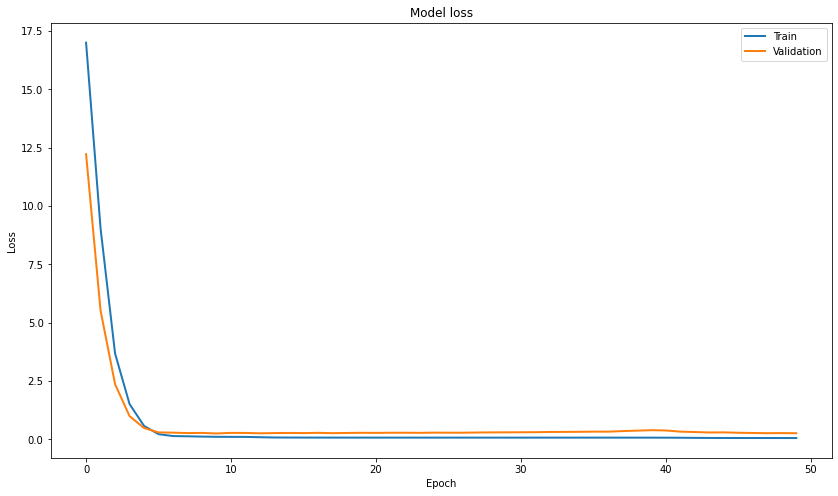

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Validation')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()



In [ ]:
test_x_predictions = autoencoder.predict(test_x_AE)
mse = np.mean(np.power(test_x_AE - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y_AE})
error_df.describe()

2883/2883 [==============================] - 4s 1ms/step


,Reconstruction_error,True_class
count,92254.000000,92254.000000
mean,0.061914,0.080669
std,0.058290,0.272327
min,0.011858,0.000000
25%,0.033360,0.000000
50%,0.047195,0.000000
75%,0.067532,0.000000
max,2.039871,1.000000


In [ ]:
error_df

,Reconstruction_error,True_class
49103,0.133219,0
96031,0.088509,0
300915,0.040528,0
260145,0.041528,0
99054,0.035969,0
...,...,...
199828,0.076139,0
137945,0.052299,0
212407,0.350265,0
259461,0.018614,0


In [ ]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class,
                                                               error_df.Reconstruction_error)

pr_auc = auc(recall_rt, precision_rt,)


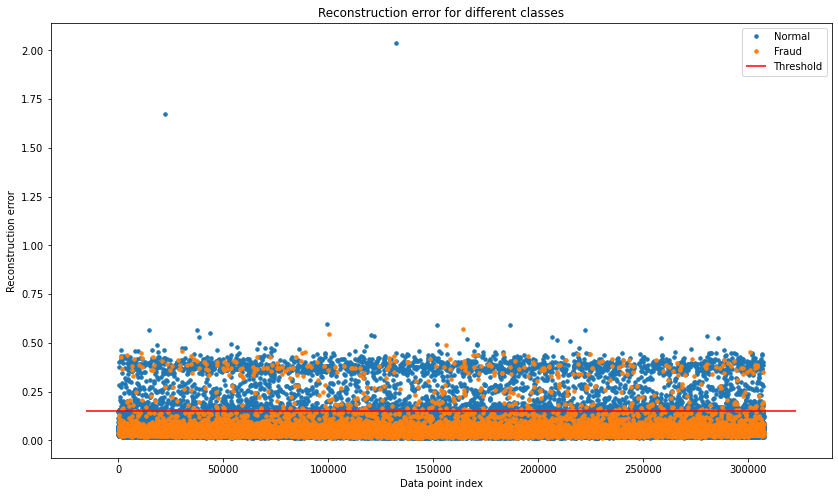

In [ ]:
threshold_fixed = 0.15
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();



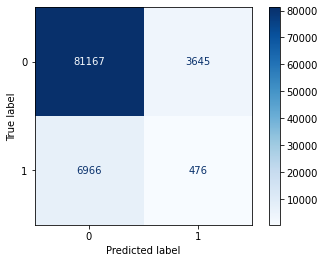

In [ ]:
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
cm = confusion_matrix(error_df.True_class, pred_y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(error_df.True_class, pred_y))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     84812
           1       0.12      0.06      0.08      7442

    accuracy                           0.88     92254
   macro avg       0.52      0.51      0.51     92254
weighted avg       0.86      0.88      0.87     92254



In [ ]:
nb_epoch = 50
batch_size = 128
n_inputs = Xsm_train_fraud.shape[1]
encoding_dim = 18
hidden_dim1 = 10 #int(encoding_dim / 2) #i.e. 7
hidden_dim2 = 6
learning_rate = 1e-7

In [ ]:
# This returns a tensor
input_layer = Input(shape=(n_inputs, ))

# a layer instance is callable on a tensor, and returns a tensor
# Dense implements the operation: output = activation(dot(input, kernel) + bias), where
# activation is the element-wise activation function passed as the activation argument,
# kernel is a weights matrix created by the layer, and
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# activity_regularizer: Regularizer function applied to the output of the layer
encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim1, activation="elu")(encoder)
encoder = Dense(hidden_dim2, activation="tanh")(encoder)
mlp = Dense(hidden_dim2, activation='relu')(encoder)
mlp = Dense(2, activation='softmax')(mlp)



# This creates a model that includes
# the Input layer and four Dense layers
mlp_autoencoder = Model(inputs=input_layer, outputs=mlp)

In [ ]:
mlp_autoencoder.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
mlp_autoencoder.fit(Xsm_train_fraud, ysm_train_fraud, validation_data=(X_val_fraud,y_val_fraud)
              , batch_size=25, epochs=20, verbose=2, callbacks = [mlp_callback])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
14246/14246 - 28s - loss: 0.6533 - accuracy: 0.6136 - val_loss: 0.7623 - val_accuracy: 0.4102 - 28s/epoch - 2ms/step
Epoch 2/20
14246/14246 - 29s - loss: 0.6387 - accuracy: 0.6335 - val_loss: 0.7762 - val_accuracy: 0.4124 - 29s/epoch - 2ms/step
Epoch 3/20
14246/14246 - 27s - loss: 0.6252 - accuracy: 0.6493 - val_loss: 0.7790 - val_accuracy: 0.4664 - 27s/epoch - 2ms/step
Epoch 4/20
14246/14246 - 27s - loss: 0.6036 - accuracy: 0.6690 - val_loss: 0.7406 - val_accuracy: 0.5171 - 27s/epoch - 2ms/step
Epoch 5/20
14246/14246 - 28s - loss: 0.5769 - accuracy: 0.6826 - val_loss: 0.9323 - val_accuracy: 0.5262 - 28s/epoch - 2ms/step
Epoch 6/20
14246/14246 - 26s - loss: 0.5532 - accuracy: 0.6947 - val_loss: 0.8898 - val_accuracy: 0.5848 - 26s/epoch - 2ms/step
Epoch 7/20
14246/14246 - 27s - loss: 0.5387 - accuracy: 0.7016 - val_loss: 0.7470 - val_accuracy: 0.6351 - 27s/epoch - 2ms/step


In [ ]:
yhat = mlp_autoencoder.predict(X_test_fraud)

2883/2883 [==============================] - 5s 2ms/step


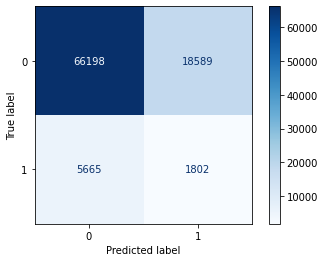

In [ ]:
y_pred = threshod_evaluation(yhat, 0.4)
cm = confusion_matrix(y_test_fraud, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
  print(classification_report(y_test_fraud, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85     84787
           1       0.09      0.24      0.13      7467

    accuracy                           0.74     92254
   macro avg       0.50      0.51      0.49     92254
weighted avg       0.85      0.74      0.79     92254



In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

from PIL import Image

from tqdm import tqdm_notebook as tqdm

In [ ]:
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return epsilon * tf.exp(z_log_var * 0.5) + z_mean



In [ ]:
def build_vae(num_pixels, num_latent_vars=3):

    # Encoder
    encoder_inputs = tf.keras.Input(shape=(num_pixels,))
    x = tf.keras.layers.Dense(512, activation='relu')(encoder_inputs)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    z_mean = tf.keras.layers.Dense(num_latent_vars)(x)
    z_log_var = tf.keras.layers.Dense(num_latent_vars)(z_mean)
    z = Sampling()([z_mean, z_log_var])

    encoder = tf.keras.Model(inputs=encoder_inputs, outputs=z)

    # Decoder
    decoder_inputs = tf.keras.Input(shape=(num_latent_vars,))
    x = tf.keras.layers.Dense(32, activation='relu')(decoder_inputs)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    reconstruction = tf.keras.layers.Dense(num_pixels, activation='linear')(x)

    decoder = tf.keras.Model(inputs=decoder_inputs, outputs=reconstruction)

    # Full model
    model_inputs = encoder.input
    model_outputs = decoder(encoder.output)

    model = tf.keras.Model(inputs=model_inputs, outputs=model_outputs)

    # Compile model for training
    model.compile(
        optimizer='adam',
        loss='mse'
    )

    # Return all three models
    return encoder, decoder, model

In [ ]:
fraud_encoder, fraud_decoder, fraud_model = build_vae(num_pixels=54, num_latent_vars=3)

In [ ]:
history = fraud_model.fit(
    train_x_AE,
    train_x_AE,
    validation_data = (val_x_AE, val_x_AE),
    batch_size=32,
    epochs=100,
    verbose = 2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
5318/5318 - 29s - loss: 0.5085 - val_loss: 0.1892 - 29s/epoch - 5ms/step
Epoch 2/100
5318/5318 - 27s - loss: 0.0754 - val_loss: 0.1895 - 27s/epoch - 5ms/step
Epoch 3/100
5318/5318 - 28s - loss: 0.0644 - val_loss: 0.1979 - 28s/epoch - 5ms/step
Epoch 4/100
5318/5318 - 28s - loss: 0.0588 - val_loss: 0.2146 - 28s/epoch - 5ms/step


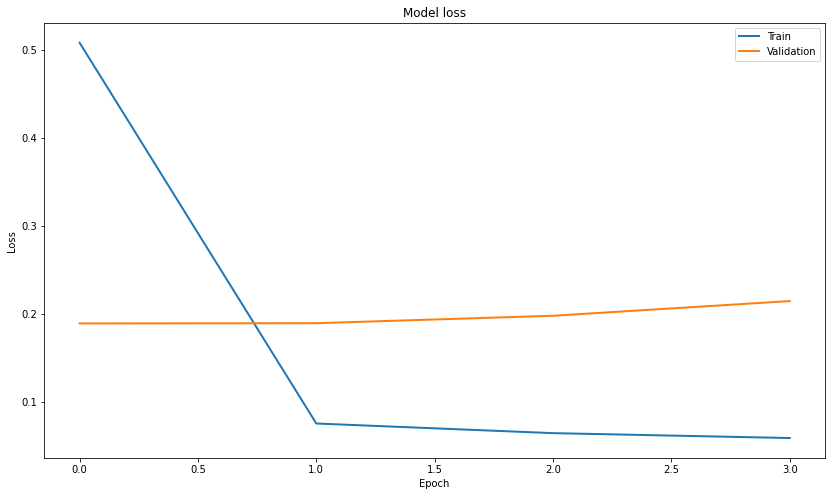

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(history.history['loss'], linewidth=2, label='Train')
plt.plot(history.history['val_loss'], linewidth=2, label='Validation')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [ ]:
test_x_predictions = fraud_model.predict(test_x_AE)
mse = np.mean(np.power(test_x_AE - test_x_predictions, 2), axis=1)
error_df_VAE = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y_AE})
error_df_VAE.describe()

2883/2883 [==============================] - 8s 3ms/step


,Reconstruction_error,True_class
count,92254.000000,92254.000000
mean,0.085080,0.080669
std,0.073374,0.272327
min,0.014091,0.000000
25%,0.041865,0.000000
50%,0.061253,0.000000
75%,0.093186,0.000000
max,0.811367,1.000000


In [ ]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df_VAE.True_class,
                                                               error_df_VAE.Reconstruction_error)

pr_auc = auc(recall_rt, precision_rt,)


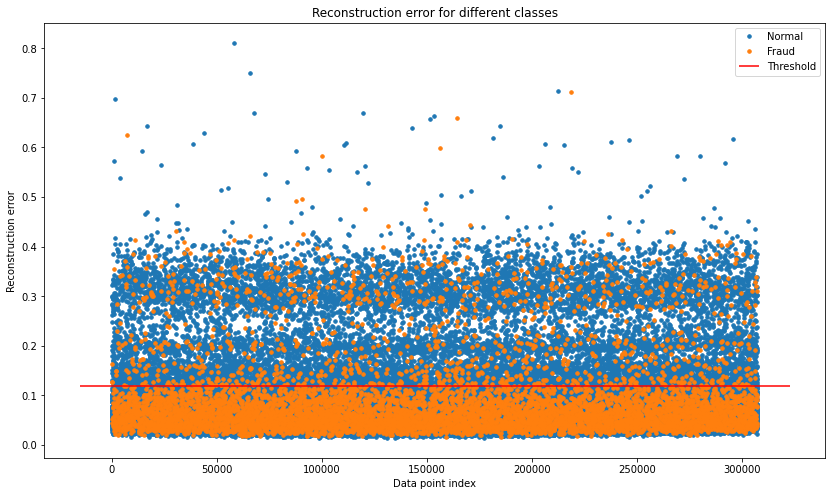

In [ ]:
threshold_fixed = 0.12
groups = error_df_VAE.groupby('True_class')
fig, ax = plt.subplots(figsize=(14, 8))

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1],
          colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

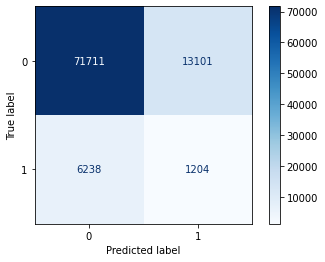

In [ ]:
pred_y = [1 if e > threshold_fixed else 0 for e in error_df_VAE.Reconstruction_error.values]
cm = confusion_matrix(error_df_VAE.True_class, pred_y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(error_df_VAE.True_class, pred_y))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     84812
           1       0.08      0.16      0.11      7442

    accuracy                           0.79     92254
   macro avg       0.50      0.50      0.50     92254
weighted avg       0.85      0.79      0.82     92254



In [ ]:
num_pixels = 54
num_latent_vars = 3
# Encoder
encoder_inputs = tf.keras.Input(shape=(num_pixels,))
x = tf.keras.layers.Dense(512, activation='relu')(encoder_inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
z_mean = tf.keras.layers.Dense(num_latent_vars)(x)
z_log_var = tf.keras.layers.Dense(num_latent_vars)(z_mean)
z = Sampling()([z_mean, z_log_var])

encoder = tf.keras.Model(inputs=encoder_inputs, outputs=z)

mlp_inputs = tf.keras.Input(shape=(num_latent_vars,))
x = Dense(3, activation='relu')(mlp_inputs)
x = Dense(2, activation='softmax')(x)

mlp = tf.keras.Model(inputs=mlp_inputs, outputs=x)

MLP_VAE_inputs = encoder.input
MLP_VAE_outputs = mlp(encoder.output)
MLP_VAE_model = tf.keras.Model(inputs = MLP_VAE_inputs, outputs = MLP_VAE_outputs)

In [ ]:
MLP_VAE_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_vae_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
MLP_VAE_model.fit(Xsm_train_fraud, ysm_train_fraud, validation_data=(X_val_fraud, y_val_fraud)
              , batch_size=25, epochs=20, verbose=2, callbacks = [mlp_vae_callback])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
14246/14246 - 46s - loss: 0.6753 - accuracy: 0.5546 - val_loss: 0.8250 - val_accuracy: 0.3381 - 46s/epoch - 3ms/step
Epoch 2/20
14246/14246 - 50s - loss: 0.6140 - accuracy: 0.6597 - val_loss: 0.4903 - val_accuracy: 0.7840 - 50s/epoch - 3ms/step
Epoch 3/20
14246/14246 - 46s - loss: 0.5091 - accuracy: 0.7320 - val_loss: 0.3876 - val_accuracy: 0.8699 - 46s/epoch - 3ms/step
Epoch 4/20
14246/14246 - 45s - loss: 0.4510 - accuracy: 0.7671 - val_loss: 0.3917 - val_accuracy: 0.8485 - 45s/epoch - 3ms/step
Epoch 5/20
14246/14246 - 45s - loss: 0.4304 - accuracy: 0.7784 - val_loss: 0.3445 - val_accuracy: 0.8960 - 45s/epoch - 3ms/step
Epoch 6/20
14246/14246 - 45s - loss: 0.4201 - accuracy: 0.7856 - val_loss: 0.3423 - val_accuracy: 0.8917 - 45s/epoch - 3ms/step
Epoch 7/20
14246/14246 - 47s - loss: 0.4080 - accuracy: 0.7926 - val_loss: 0.3691 - val_accuracy: 0.8848 - 47s/epoch - 3ms/step
Epoch 8/20
14246/14246 - 49s - loss: 0.4004 - accuracy: 0.7975 - val_loss: 0.3514 - val_accuracy: 0.8935

In [ ]:
yhat = MLP_VAE_model.predict(X_test_fraud)

2883/2883 [==============================] - 6s 2ms/step


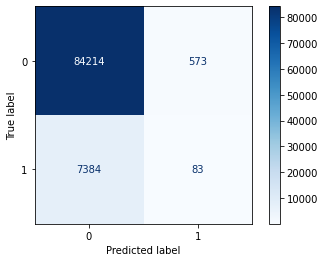

In [ ]:
y_pred = threshod_evaluation(yhat, 0.4)
cm = confusion_matrix(y_test_fraud, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test_fraud, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     84787
           1       0.13      0.01      0.02      7467

    accuracy                           0.91     92254
   macro avg       0.52      0.50      0.49     92254
weighted avg       0.86      0.91      0.88     92254

